In [51]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_excel("SouthGermanCredit.xlsx")
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [84]:
# changing column names from german to english
df.columns = ['status', 'duration', 'credit_history','purpose','amount', 'savings', 'employment_duration',
              'installment_rate','personal_status_sex', 'other_debtors', 'present_residence','property', 'age', 
              'other_installment_plans', 'housing','number_credits', 'job', 'people_liable', 'telephone',
              'foreign_worker', 'kredit', 'label']

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [4]:
df.shape

(1000, 21)

In [5]:
# prepare for clustering - drop KREDIT
df1 = df.drop("kredit", axis=1)

## K-MEANS (default, k=8)

In [6]:
kmeans = KMeans()
kmeans.fit(df1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[2 6 2 6 6 6 0 2 2 0 0 5 6 3 6 6 0 0 6 5 0 0 6 2 7 7 2 2 0 7 0 0 5 2 6 2 2
 6 0 0 2 6 2 6 2 2 2 6 2 2 2 0 2 6 5 2 2 2 0 0 2 6 0 1 2 2 0 6 2 6 6 6 6 2
 0 6 0 6 2 6 6 0 5 6 2 0 6 7 2 6 6 0 7 2 5 7 0 7 6 5 0 2 7 3 6 2 2 2 2 6 0
 2 6 2 0 5 6 6 2 0 7 5 6 2 2 7 2 0 6 0 6 6 6 2 2 2 2 6 2 0 0 0 7 6 6 6 0 2
 2 6 2 6 3 0 2 6 2 5 5 0 2 2 0 0 2 6 5 7 6 2 5 2 2 2 6 0 7 6 6 1 2 2 3 6 2
 5 6 0 6 0 6 0 3 6 2 5 5 6 6 0 6 3 2 3 0 7 2 2 1 6 2 6 6 2 2 0 0 2 1 2 6 0
 7 3 6 2 7 2 2 0 2 2 3 0 2 2 6 6 2 6 2 1 2 2 6 0 6 7 6 7 0 5 2 0 5 6 0 6 6
 0 6 2 2 2 2 6 6 2 2 2 2 3 2 6 6 0 0 0 0 2 2 6 7 6 0 2 2 6 6 2 0 6 6 2 2 3
 6 6 2 6 2 7 0 0 2 2 2 2 6 3 2 6 2 2 2 2 2 0 2 2 2 6 6 6 2 2 2 2 6 5 6 6 2
 2 2 6 2 2 0 2 0 0 0 0 2 6 2 2 6 2 6 2 3 0 2 1 0 2 6 7 2 6 2 2 6 6 2 2 2 0
 5 6 3 2 2 0 2 5 2 5 0 0 4 2 0 2 2 3 2 6 0 2 2 2 7 2 5 2 2 5 6 2 2 0 7 7 7
 2 6 5 2 0 2 6 2 6 2 5 2 2 2 2 2 6 6 2 1 2 2 0 7 2 6 6 2 2 2 2 6 0 6 7 4 2
 2 2 2 2 7 2 2 6 5 5 0 3 6 6 6 6 5 3 0 0 3 2 6 7 6 2 6 2 3 6 7 2 0 0 6 0 7
 0 0 5 2 2 0 0 2 0 6 0 0 

In [7]:
#Print Silhouette measure
print("SILHOUETTE_SCORE = ",silhouette_score(df1, kmeans.labels_))
print("ROWS,COLUMNS: ",df1.shape)

SILHOUETTE_SCORE =  0.5723044412962385
ROWS,COLUMNS:  (1000, 20)


## K-MEANS (k=2)

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [9]:
#Print Silhouette measure
print("SILHOUETTE_SCORE = ",silhouette_score(df1, kmeans.labels_))
print("ROWS,COLUMNS: ",df1.shape)

SILHOUETTE_SCORE =  0.7222312904192741
ROWS,COLUMNS:  (1000, 20)


## K-MEANS (k=3)

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 2 0 0 0 0 0 0 1 0 0 2 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 1 0 0 2 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 2 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 

In [11]:
#Print Silhouette measure
print("SILHOUETTE_SCORE = ",silhouette_score(df1, kmeans.labels_))
print("ROWS,COLUMNS: ",df1.shape)

SILHOUETTE_SCORE =  0.6478558590708904
ROWS,COLUMNS:  (1000, 20)


## K-MEANS (k=4)

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 2 0 0 0 0 2 0 0 2 2 1 0 1 0 2 2 2 0 1 2 2 0 0 2 2 0 0 2 2 2 2 1 0 0 0 0
 0 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 1 0 0 0 2 2 0 2 2 3 0 0 2 0 0 0 2 0 0 0
 2 0 2 0 0 0 0 2 1 0 0 2 0 2 0 0 0 2 2 0 1 2 2 2 0 1 2 0 2 1 0 0 0 0 0 0 2
 0 0 0 2 1 0 2 0 2 2 1 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0
 0 0 0 0 1 2 0 2 0 1 1 2 0 0 2 2 0 0 1 2 2 0 1 0 0 0 0 2 2 0 0 3 0 0 1 2 0
 1 0 2 0 2 0 2 1 0 0 1 1 0 0 2 0 1 0 1 2 2 0 0 3 2 0 2 0 0 0 2 2 0 3 0 0 2
 2 1 2 0 2 0 0 2 0 0 1 2 0 0 0 0 0 2 0 3 0 0 0 2 0 2 2 2 2 1 0 2 1 2 2 0 0
 2 2 0 0 0 0 2 0 0 0 0 0 1 0 2 2 2 2 2 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 1
 0 0 0 0 0 2 2 2 0 0 0 0 2 1 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0
 0 0 0 0 0 2 0 2 2 2 2 0 0 0 0 0 0 0 0 1 2 0 3 2 0 0 2 0 0 0 0 0 2 0 0 0 2
 1 2 1 0 0 2 0 1 0 1 2 2 3 0 2 0 0 1 0 2 2 0 0 0 1 0 1 0 0 1 2 0 0 2 2 1 2
 0 0 1 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0 3 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 3 0
 0 0 0 0 2 0 0 0 1 1 2 1 2 0 0 0 1 1 2 2 1 0 0 2 0 0 0 0 1 0 2 0 2 2 2 2 2
 2 2 1 0 0 2 2 0 2 0 2 2 

In [13]:
#Print Silhouette measure
print("SILHOUETTE_SCORE = ",silhouette_score(df1, kmeans.labels_))
print("ROWS,COLUMNS: ",df1.shape)

SILHOUETTE_SCORE =  0.6118312435223461
ROWS,COLUMNS:  (1000, 20)


## GOOD VS BAD CREDIT IN EACH CLUSTER/GROUP

In [86]:
# using k=2 as it is giving best SILHOUETTE_SCORE
kmeans = KMeans(n_clusters=2)
kmeans.fit(df1)
df["label"] = kmeans.labels_
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,kredit,label
0,1,18,4,2,1049,1,2,4,2,1,...,21,3,1,1,3,2,1,2,1,0
1,1,9,4,0,2799,1,3,2,3,1,...,36,3,1,2,3,1,1,2,1,0
2,2,12,2,9,841,2,4,2,2,1,...,23,3,1,1,2,2,1,2,1,0
3,1,12,4,0,2122,1,3,3,3,1,...,39,3,1,2,2,1,1,1,1,0
4,1,12,4,0,2171,1,3,4,3,1,...,38,1,2,2,2,2,1,1,1,0


0    827
1    173
Name: label, dtype: int64 



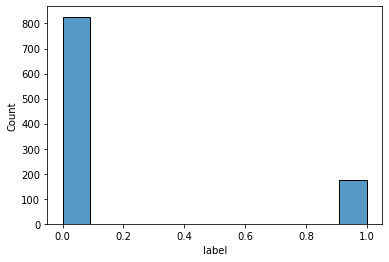

In [38]:
print(df.label.value_counts(),"\n")
sns.histplot(df.label);

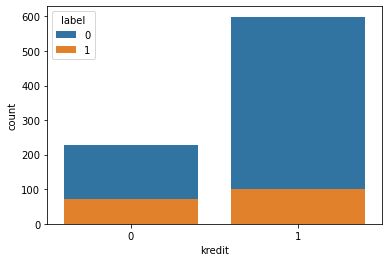

In [61]:
sns.countplot(df.kredit, hue=df.label, dodge=False);

In [18]:
df["kredit"].where(df.label==1).value_counts()

1.0    101
0.0     72
Name: kredit, dtype: int64

In [19]:
df["kredit"].where(df.label==0).value_counts()

1.0    599
0.0    228
Name: kredit, dtype: int64

## OVERALL ACCURACY

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(df.kredit, df.label)

0.671

## Analysing debtors who are bad credits ("0" in the Target column)

In [78]:
for i in df.columns.drop("kredit"):
    print(i,"summary for debters with bad credit",":\n",df[i].where(df.kredit==0).describe())

status summary for debters with bad credit :
 count    300.000000
mean       1.903333
std        1.050874
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: status, dtype: float64
duration summary for debters with bad credit :
 count    300.000000
mean      24.860000
std       13.282639
min        6.000000
25%       12.000000
50%       24.000000
75%       36.000000
max       72.000000
Name: duration, dtype: float64
credit_history summary for debters with bad credit :
 count    300.000000
mean       2.166667
std        1.078316
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: credit_history, dtype: float64
purpose summary for debters with bad credit :
 count    300.000000
mean       2.903333
std        2.978292
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: purpose, dtype: float64
amount summary for debters with bad cr

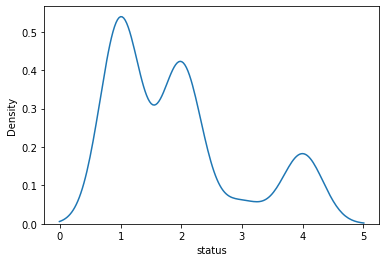

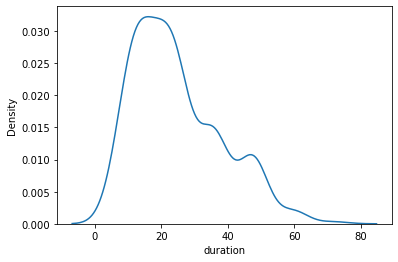

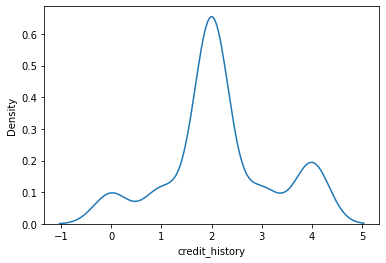

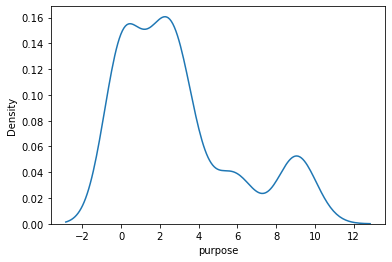

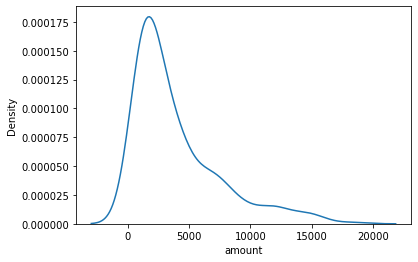

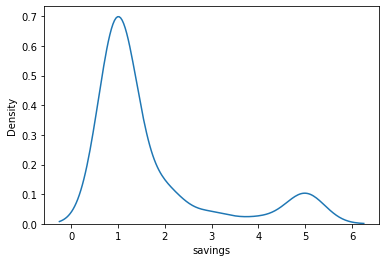

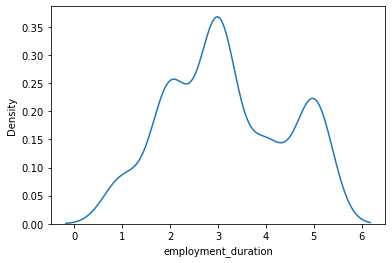

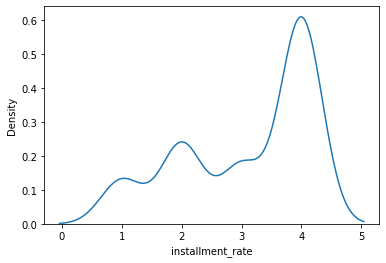

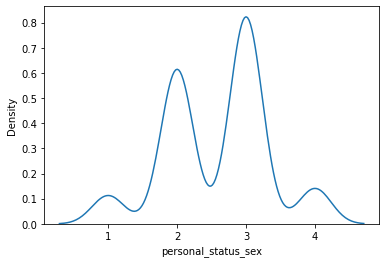

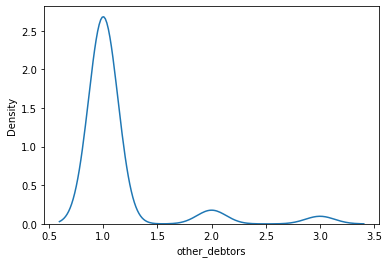

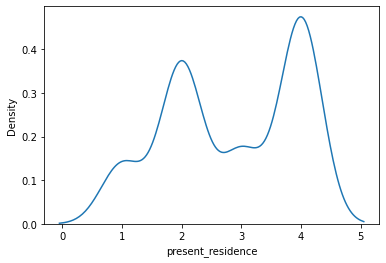

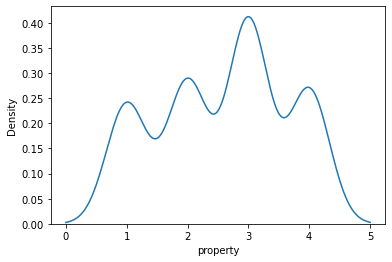

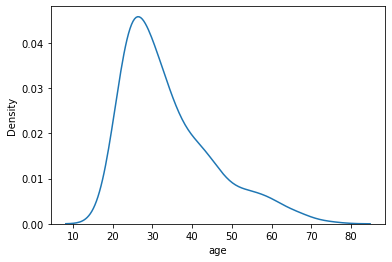

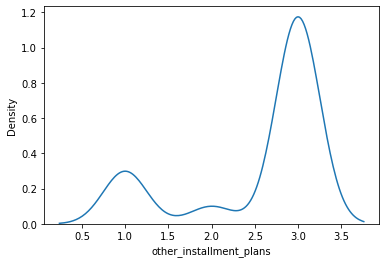

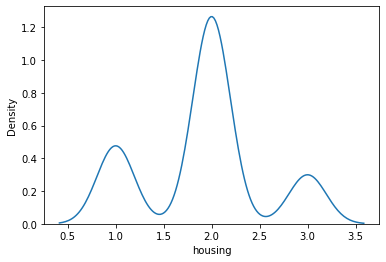

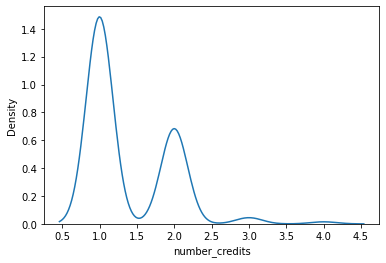

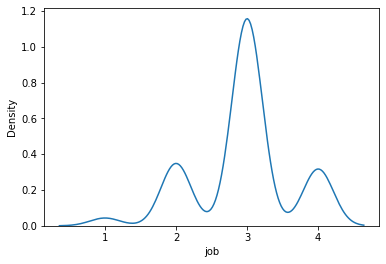

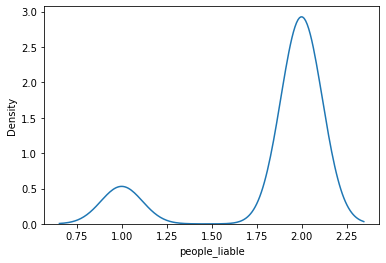

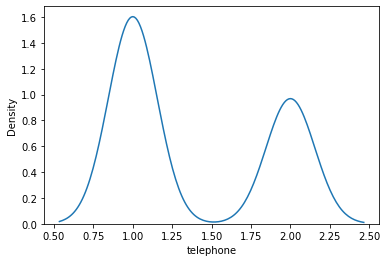

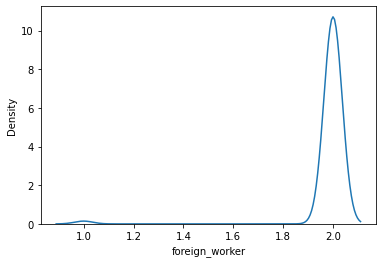

In [82]:
for i in df.columns.drop(["label","kredit"]):
    sns.kdeplot(df[i].where(df.kredit==0));
    plt.show()

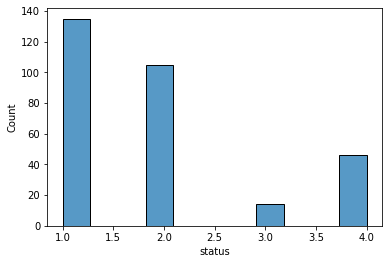

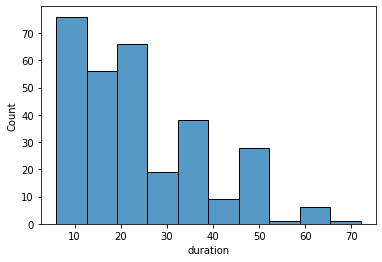

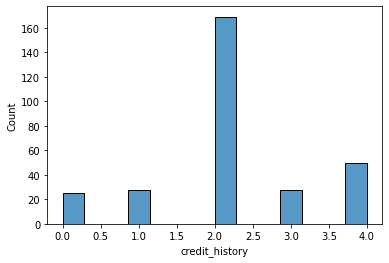

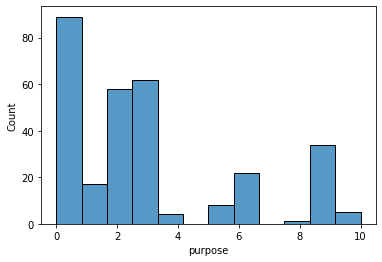

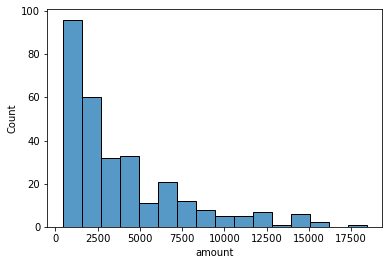

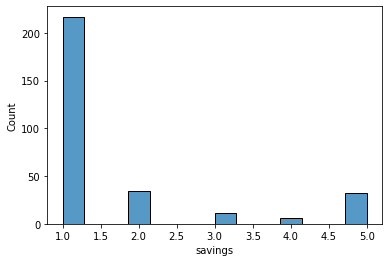

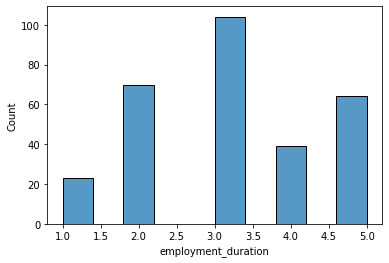

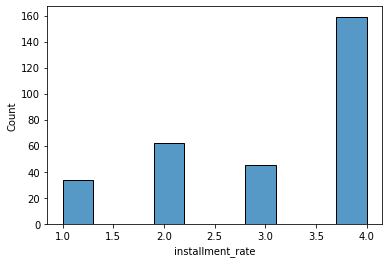

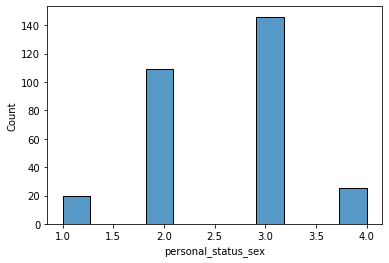

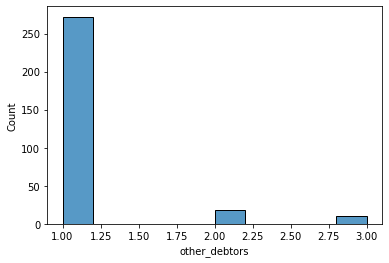

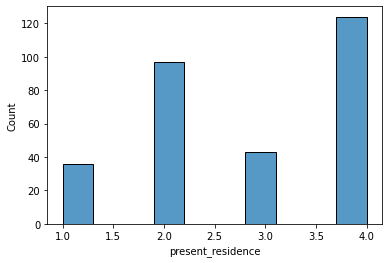

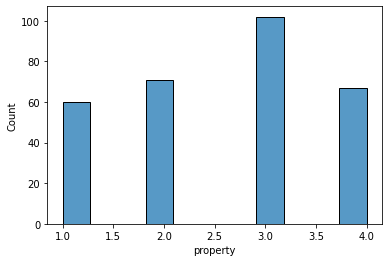

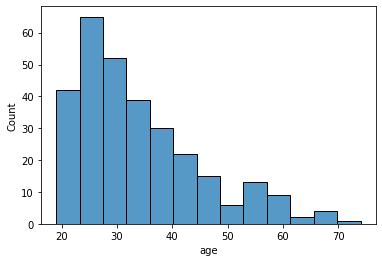

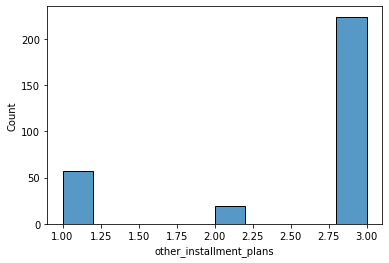

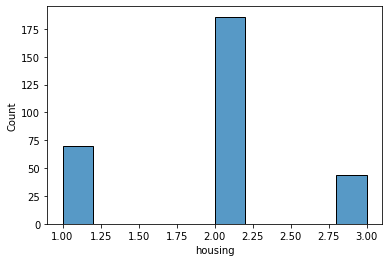

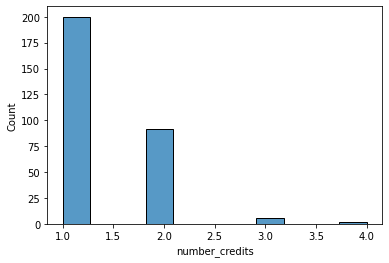

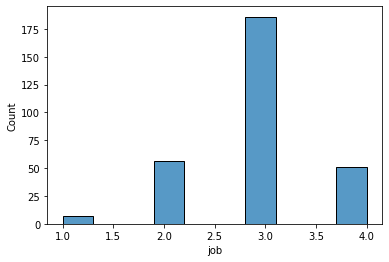

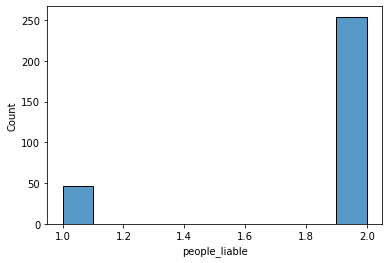

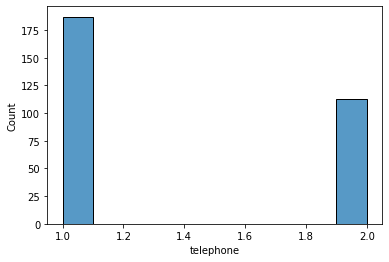

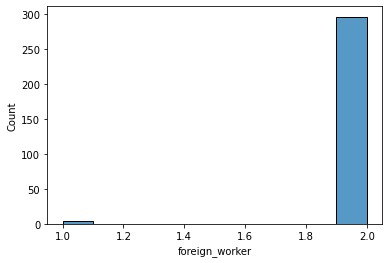

In [83]:
for i in df.columns.drop(["label","kredit"]):
    sns.histplot(df[i].where(df.kredit==0));
    plt.show()